# Baltimore Victim Based Crime Data

Do the necessaries imports:

In [139]:
%matplotlib inline

import numpy as np
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

import shapefile as shp

from datetime import datetime

In [140]:
from os import makedirs
from os.path import exists, isfile, getsize

# import urllib.request as urllib       # Python 2.7
from urllib.request import urlretrieve  # Python 3

If the temporaries directories don't exist, so create them:

In [141]:
path_of_folders = ["files/data/", "files/shp/"]

for path_of_folder in path_of_folders:
    if not exists(path_of_folder):
        makedirs(path_of_folder)

# Download the ShapeFile and CSV data

Download the CSV data from https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij

In [142]:
based_crime_data_data = "files/data/Based_Crime_Data.csv"

In [143]:
based_crime_data_csv = "https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv?accessType=DOWNLOAD"

# download the file
# urlretrieve(based_crime_data_csv, based_crime_data_csv)

if isfile(based_crime_data_data):
    tam = getsize(based_crime_data_data)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  40538138  bytes.


Download the ShapeFile of Baltimore from https://data.baltimorecity.gov/Geographic/Land-use-Shape/feax-3ycj

In [144]:
shape_file_data = "files/shp/landuse.zip"

In [145]:
shape_file_zip = "https://data.baltimorecity.gov/api/views/feax-3ycj/files/hMHrtD_9UtnfKw47cqs_2RYH9ZXET7TlpW4V4_4A_IE?filename=Landuse.zip"

# download the file
# urlretrieve(shape_file_zip, shape_file_data)

if isfile(shape_file_data):
    tam = getsize(shape_file_data)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  3709817  bytes.


The projection of the points in dataframe is WGS84 (EPSG:4326) and the shapefile of Baltimore I have no idea... So I used the QGIS to reproject the shapefile to WGS84 (EPSG:4326)

# Read the ShapeFile and CSV data

Load the shapefile to use it in the future:

In [146]:
shape_file_path = "files/shp/landuse_4326/landuse_4326.shp"  

shape_file = shp.Reader(shape_file_path)

Read the CSV keeping the same header and change the Location.1 column to location from df_crimes:

In [147]:
df_crimes = pd.read_csv(based_crime_data_data)

df_crimes = df_crimes.rename(columns={"Location 1": "Lat_Long"})

df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,NaN,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,NaN,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1


Describe the dataframe:

In [148]:
df_crimes.describe()

,Post,Longitude,Latitude,Total Incidents
count,272025.000000,270081.000000,270081.000000,272252.0
mean,506.183288,-76.617435,39.307419,1.0
std,260.701478,0.042297,0.029545,0.0
min,2.000000,-76.711620,39.200410,1.0
25%,243.000000,-76.648430,39.288350,1.0
50%,511.000000,-76.613970,39.303660,1.0
75%,731.000000,-76.587450,39.327810,1.0
max,945.000000,-76.528500,39.372930,1.0


Information about the dataframe:

In [149]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272252 entries, 0 to 272251
Data columns (total 15 columns):
CrimeDate          272252 non-null object
CrimeTime          272252 non-null object
CrimeCode          272252 non-null object
Location           270078 non-null object
Description        272252 non-null object
Inside/Outside     262667 non-null object
Weapon             93951 non-null object
Post               272025 non-null float64
District           272170 non-null object
Neighborhood       269553 non-null object
Longitude          270081 non-null float64
Latitude           270081 non-null float64
Lat_Long           270081 non-null object
Premise            262189 non-null object
Total Incidents    272252 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 31.2+ MB


Do a copy of dataframe:

In [150]:
df_crimes_cp = df_crimes.copy()

# Convert the date in string to datetime

Create a new column called CrimeDateTime with the date in datetime:

In [151]:
df_crimes_cp['CrimeDateTime'] = pd.to_datetime(df_crimes_cp['CrimeDate'])

df_crimes_cp.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents,CrimeDateTime
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,NaN,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1,2017-08-05
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1,2017-08-05
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1,2017-08-05
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1,2017-08-05
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,NaN,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1,2017-08-05


The column CrimeDateTime is in the end, so... we will reorder the columns:

In [152]:
# get the list of columns
cols = df_crimes_cp.columns.tolist()
# put the last column as first column
cols = cols[-1:] + cols[:-1]
# reorder the columns
df_crimes_cp = df_crimes_cp[cols]

df_crimes_cp.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
0,2017-08-05,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,NaN,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1
1,2017-08-05,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1
2,2017-08-05,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1
3,2017-08-05,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1
4,2017-08-05,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,NaN,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1


# Create a function to plot the shapefile with the points of crimes

In [153]:
def plot_shapefile_and_points(shape_file, df_crimes, title_of_plot):

    # settings of the plot
    plt.figure(figsize=(15,10))  # image size
    plt.axis([-76.725, -76.52, 39.19, 39.38])  # axis
    plt.title(title_of_plot)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    

    # put the shapefile on plot
    for shape in shape_file.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'b')  # b - blue

    # Get the x (Longitude) and y (Latitude) values
    # Put the points of crimes on plot
    x = np.array(list(df_crimes["Longitude"]))
    y = np.array(list(df_crimes["Latitude"]))
    plt.plot(x, y, 'ro')  # r - red , o - circle


    # show the plot
    plt.show()

# Example 1: All crimes in Baltimore on a date

Get all crimes on the following date:

In [154]:
date = datetime(2016, 12, 25)

df_crimes_query = df_crimes_cp[df_crimes_cp.CrimeDateTime == date]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 30381 to 30492
Data columns (total 16 columns):
CrimeDateTime      112 non-null datetime64[ns]
CrimeDate          112 non-null object
CrimeTime          112 non-null object
CrimeCode          112 non-null object
Location           111 non-null object
Description        112 non-null object
Inside/Outside     112 non-null object
Weapon             48 non-null object
Post               112 non-null float64
District           112 non-null object
Neighborhood       111 non-null object
Longitude          111 non-null float64
Latitude           111 non-null float64
Lat_Long           111 non-null object
Premise            112 non-null object
Total Incidents    112 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(11)
memory usage: 14.9+ KB


In [155]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
30381,2016-12-25,12/25/2016,23:53:00,7A,2400 ORLEANS ST,AUTO THEFT,O,NaN,221.0,SOUTHEASTERN,McElderry Park,-76.58301,39.29562,"(39.2956200000, -76.5830100000)",STREET,1
30382,2016-12-25,12/25/2016,23:15:00,4D,1200 SARGEANT ST,AGG. ASSAULT,I,HANDS,932.0,SOUTHERN,Washington Village/Pigtow,-76.63494,39.28179,"(39.2817900000, -76.6349400000)",ROW/TOWNHO,1
30383,2016-12-25,12/25/2016,22:42:00,4E,1000 SAINT PAUL ST,COMMON ASSAULT,I,HANDS,141.0,CENTRAL,Mid-Town Belvedere,-76.61436,39.30171,"(39.3017100000, -76.6143600000)",APT/CONDO,1
30384,2016-12-25,12/25/2016,22:32:00,3AF,2400 GREENMOUNT AVE,ROBBERY - STREET,O,FIREARM,341.0,EASTERN,Barclay,-76.60950,39.31673,"(39.3167300000, -76.6095000000)",STREET,1
30385,2016-12-25,12/25/2016,22:00:00,3CF,3100 MCELDERRY ST,ROBBERY - COMMERCIAL,I,FIREARM,224.0,SOUTHEASTERN,Ellwood Park/Monument,-76.57275,39.29809,"(39.2980900000, -76.5727500000)",CONVENIENC,1


## Plot the data

Plot the shapefile with the point of crimes:

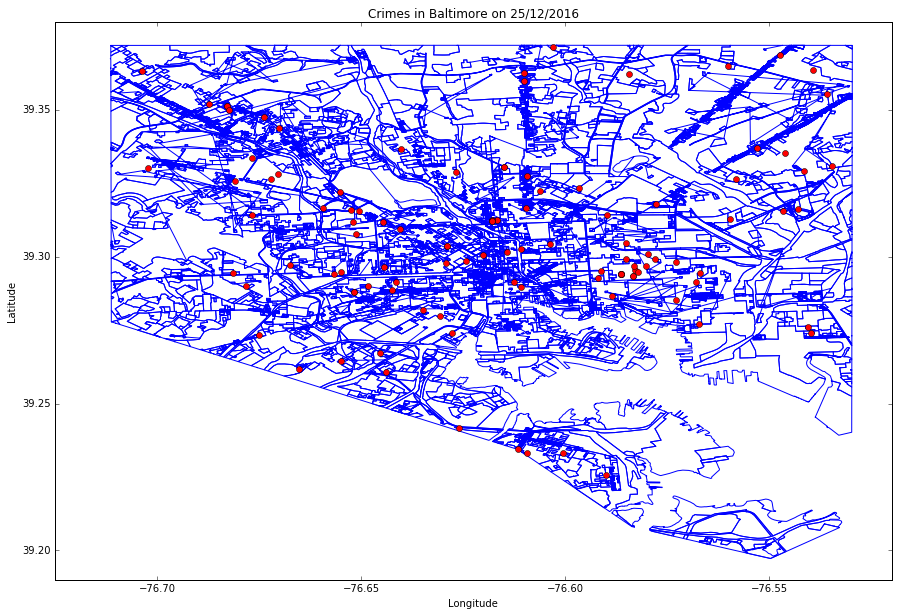

In [156]:
title_of_plot = 'Crimes in Baltimore on ' + str(date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points(shape_file, df_crimes_query, title_of_plot)

# Example 2: All assaults in Baltimore on a date

In [171]:
date = datetime(2017, 3, 25)
type_of_crime = "assault"

type_of_crime_regex = "(?i)" + type_of_crime  # (?i) - ignore case

# na=False - ignore NA values
df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime == date) & 
                               (df_crimes_cp['Description'].str.contains(type_of_crime_regex, na=False))]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 18622 to 18744
Data columns (total 16 columns):
CrimeDateTime      48 non-null datetime64[ns]
CrimeDate          48 non-null object
CrimeTime          48 non-null object
CrimeCode          48 non-null object
Location           48 non-null object
Description        48 non-null object
Inside/Outside     35 non-null object
Weapon             47 non-null object
Post               48 non-null float64
District           48 non-null object
Neighborhood       48 non-null object
Longitude          48 non-null float64
Latitude           48 non-null float64
Lat_Long           48 non-null object
Premise            35 non-null object
Total Incidents    48 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(11)
memory usage: 6.4+ KB


In [172]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
18622,2017-03-25,03/25/2017,23:30:00,4E,2400 BARCLAY ST,COMMON ASSAULT,I,HANDS,341.0,EASTERN,Barclay,-76.61133,39.31689,"(39.3168900000, -76.6113300000)",ROW/TOWNHO,1
18626,2017-03-25,03/25/2017,22:17:00,4E,3400 JUNEWAY,COMMON ASSAULT,I,HANDS,432.0,NORTHEASTERN,Belair-Edison,-76.56817,39.31812,"(39.3181200000, -76.5681700000)",ROW/TOWNHO,1
18629,2017-03-25,03/25/2017,21:30:00,4E,3200 RAVENWOOD AVE,COMMON ASSAULT,I,HANDS,434.0,NORTHEASTERN,Four By Four,-76.57808,39.31533,"(39.3153300000, -76.5780800000)",ROW/TOWNHO,1
18633,2017-03-25,03/25/2017,21:30:00,4C,REGESTER ST & E PRATT ST,AGG. ASSAULT,O,OTHER,212.0,SOUTHEASTERN,Upper Fells Point,-76.59248,39.28929,"(39.2892900000, -76.5924800000)",STREET,1
18637,2017-03-25,03/25/2017,21:00:00,4E,900 SAINT PAUL ST,COMMON ASSAULT,O,HANDS,142.0,CENTRAL,Mount Vernon,-76.61424,39.29985,"(39.2998500000, -76.6142400000)",STREET,1


## Plot the data

Plot the shapefile with the point of crimes:

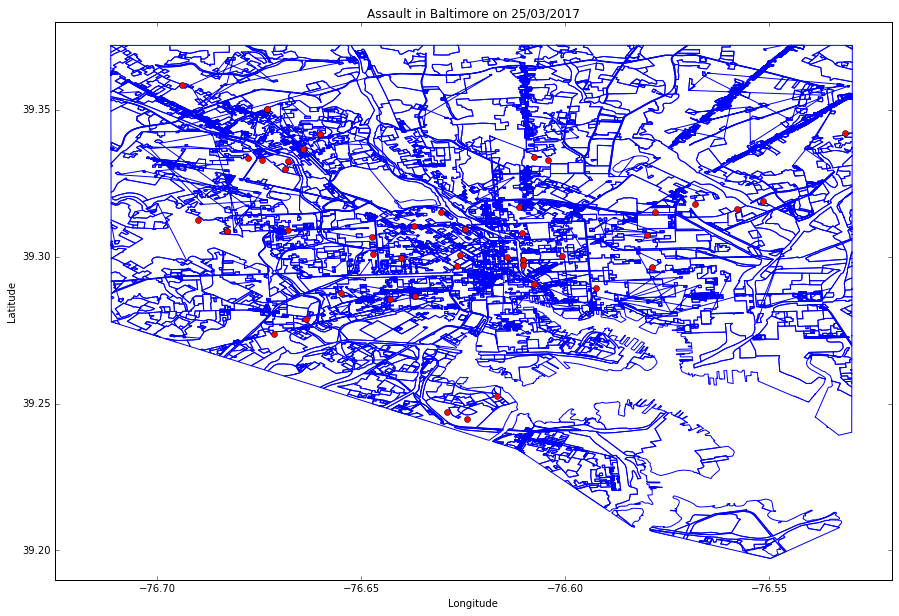

In [173]:
title_of_plot = type_of_crime.capitalize() + ' in Baltimore on ' + str(date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points(shape_file, df_crimes_query, title_of_plot)

# Example 3: All crimes in Saint Paul in Baltimore on a range of date

In [177]:
date_start = datetime(2017, 5, 13)
date_end = datetime(2017, 8, 15)

location = "SAINT PAUL"
location_regex = "(?i)" + location  # (?i) - ignore case

# na=False - ignore NA values
df_crimes_query = df_crimes_cp[
                                (df_crimes_cp.CrimeDateTime >= date_start) & 
                                (df_crimes_cp.CrimeDateTime <= date_end) &
                                (df_crimes_cp['Location'].str.contains(location_regex, na=False))
                               ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 150 to 11635
Data columns (total 16 columns):
CrimeDateTime      62 non-null datetime64[ns]
CrimeDate          62 non-null object
CrimeTime          62 non-null object
CrimeCode          62 non-null object
Location           62 non-null object
Description        62 non-null object
Inside/Outside     52 non-null object
Weapon             19 non-null object
Post               62 non-null float64
District           62 non-null object
Neighborhood       62 non-null object
Longitude          62 non-null float64
Latitude           62 non-null float64
Lat_Long           62 non-null object
Premise            52 non-null object
Total Incidents    62 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(11)
memory usage: 8.2+ KB


In [178]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
150,2017-08-04,08/04/2017,11:29:00,6F,3500 SAINT PAUL ST,LARCENY,O,NaN,512.0,NORTHERN,Charles Village,-76.61604,39.33005,"(39.3300500000, -76.6160400000)",STREET,1
197,2017-08-03,08/03/2017,22:30:00,4A,300 SAINT PAUL ST,AGG. ASSAULT,NaN,FIREARM,111.0,CENTRAL,Downtown,-76.61350,39.29254,"(39.2925400000, -76.6135000000)",NaN,1
234,2017-08-03,08/03/2017,17:44:00,6G,3500 SAINT PAUL ST,LARCENY,NaN,NaN,512.0,NORTHERN,Charles Village,-76.61604,39.33005,"(39.3300500000, -76.6160400000)",NaN,1
386,2017-08-02,08/02/2017,15:00:00,3AK,300 SAINT PAUL ST,ROBBERY - STREET,O,KNIFE,111.0,CENTRAL,Downtown,-76.61350,39.29254,"(39.2925400000, -76.6135000000)",STREET,1
506,2017-08-01,08/01/2017,16:20:00,6D,3300 SAINT PAUL ST,LARCENY FROM AUTO,O,NaN,512.0,NORTHERN,Charles Village,-76.61612,39.32822,"(39.3282200000, -76.6161200000)",STREET,1


## Plot the data

Plot the shapefile with the point of crimes:

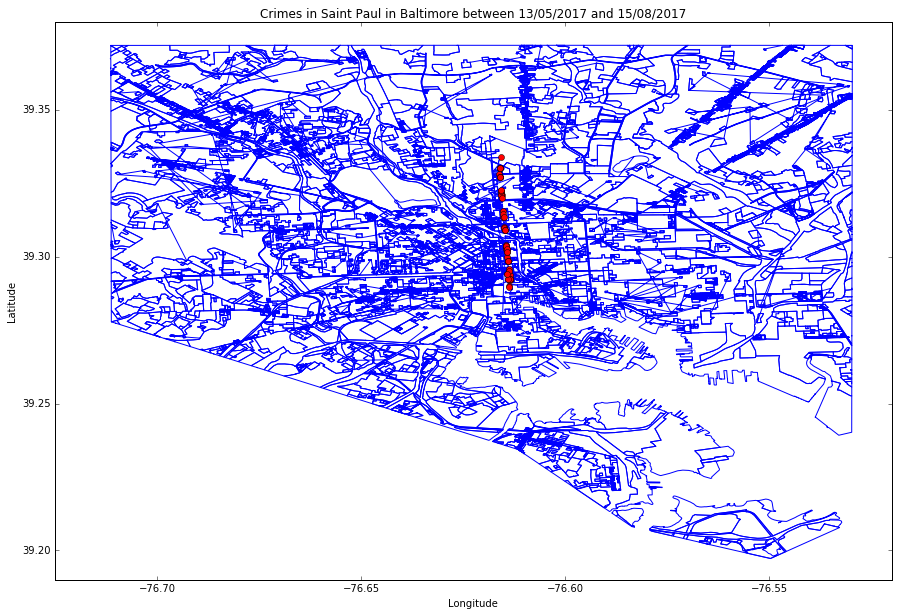

In [182]:
title_of_plot = 'Crimes in ' + location.title() + ' in Baltimore between ' + str(date_start.date().strftime("%d/%m/%Y")) + ' and ' + str(date_end.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points(shape_file, df_crimes_query, title_of_plot)

More information about Pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html